# Predict Customer Churn
* start date: 20.06.24

> 고객 데이터에 관심이 많다. 특히 고객 이탈에 대해 공부를 해보고 싶었는데, Kaggle에 공개된 데이터셋이 존재했다.

* 목표: 통신사 도메인의 고객 데이터를 활용한 고객 이탈 예측 모델 생성
* 데이터셋: [캐글 데이터셋](https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-데이터-불러오기" data-toc-modified-id="1.-데이터-불러오기-1">1. 데이터 불러오기</a></span></li><li><span><a href="#2.-데이터-전처리" data-toc-modified-id="2.-데이터-전처리-2">2. 데이터 전처리</a></span><ul class="toc-item"><li><span><a href="#2.1-컬럼명-변경" data-toc-modified-id="2.1-컬럼명-변경-2.1">2.1 컬럼명 변경</a></span></li><li><span><a href="#2.2-이진-텍스트-데이터-숫자로-변경" data-toc-modified-id="2.2-이진-텍스트-데이터-숫자로-변경-2.2">2.2 이진 텍스트 데이터 숫자로 변경</a></span></li></ul></li><li><span><a href="#3.-데이터-살펴보기" data-toc-modified-id="3.-데이터-살펴보기-3">3. 데이터 살펴보기</a></span><ul class="toc-item"><li><span><a href="#3.1-gender" data-toc-modified-id="3.1-gender-3.1">3.1 gender</a></span></li><li><span><a href="#3.2-seniorcitizen" data-toc-modified-id="3.2-seniorcitizen-3.2">3.2 seniorcitizen</a></span></li><li><span><a href="#3.3-partner,-dependents" data-toc-modified-id="3.3-partner,-dependents-3.3">3.3 partner, dependents</a></span></li><li><span><a href="#3.4-tenure" data-toc-modified-id="3.4-tenure-3.4">3.4 tenure</a></span></li><li><span><a href="#3.5-phoneservice,-multiplelines" data-toc-modified-id="3.5-phoneservice,-multiplelines-3.5">3.5 phoneservice, multiplelines</a></span></li><li><span><a href="#3.6-internetservice,-onlinesecurity,-onlinebackup,-deviceprotection,-techsupport" data-toc-modified-id="3.6-internetservice,-onlinesecurity,-onlinebackup,-deviceprotection,-techsupport-3.6">3.6 internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport</a></span></li><li><span><a href="#3.7-----streamingtv,-streamingmovies" data-toc-modified-id="3.7-----streamingtv,-streamingmovies-3.7">3.7     streamingtv, streamingmovies</a></span></li><li><span><a href="#3.8-contract" data-toc-modified-id="3.8-contract-3.8">3.8 contract</a></span></li><li><span><a href="#3.9-paperlessbilling" data-toc-modified-id="3.9-paperlessbilling-3.9">3.9 paperlessbilling</a></span></li><li><span><a href="#3.10-paymentmethod" data-toc-modified-id="3.10-paymentmethod-3.10">3.10 paymentmethod</a></span></li><li><span><a href="#3.11-monthlycharges" data-toc-modified-id="3.11-monthlycharges-3.11">3.11 monthlycharges</a></span></li></ul></li></ul></div>

## 1. 데이터 불러오기

In [255]:
import pandas as pd
pd.set_option('display.max_columns', 30)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import missingno as msno
from tqdm import tqdm_notebook

In [256]:
plt.rc('font', size=13)
plt.rc('font', family='NanumGothic')

In [132]:
df = pd.read_csv('source/Telco_Customer/Telco_Customer_Churn.csv')

In [133]:
df.shape

(7043, 21)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [135]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [136]:
df.tail(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


* object 형식의 컬럼이 많은데, 대부분 No, Yes 형식의 binary text가 많다.
    * 이 컬럼들은 전처리 시 [0, 1]로 변경하자.
* 그리고, 컬럼명이 어떤 것은 카멜표기법이고, 어떤것은 그냥 소문자 표기법이다.
    * 오타도 줄일 겸, 모두 소문자로 컬럼명을 변경해버리자.

## 2. 데이터 전처리

### 2.1 컬럼명 변경
* 소문자로 변경하자

In [137]:
col_lower = [col.lower() for col in df.columns]
col_lower

['customerid',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'monthlycharges',
 'totalcharges',
 'churn']

In [138]:
df.columns = col_lower
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

### 2.2 이진 텍스트 데이터 숫자로 변경

In [140]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [141]:
cols = ['partner', 'dependents', 'phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup',
        'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 
        'paperlessbilling', 'churn']
for col in cols:
    print('{:<17}: {}'.format(col, df[col].unique()))

partner          : ['Yes' 'No']
dependents       : ['No' 'Yes']
phoneservice     : ['No' 'Yes']
multiplelines    : ['No phone service' 'No' 'Yes']
onlinesecurity   : ['No' 'Yes' 'No internet service']
onlinebackup     : ['Yes' 'No' 'No internet service']
deviceprotection : ['No' 'Yes' 'No internet service']
techsupport      : ['No' 'Yes' 'No internet service']
streamingtv      : ['No' 'Yes' 'No internet service']
streamingmovies  : ['No' 'Yes' 'No internet service']
paperlessbilling : ['Yes' 'No']
churn            : ['No' 'Yes']


* ['No' 'Yes' 'No internet service']는 ['No', 'Yes']로 변경해주고,
* No: 0과 Yes: 1로 변경해주자

In [145]:
for col in cols:
    df[col].replace({'No': 0,
                     'No internet service': 0,
                     'No phone service': 0,
                     'Yes': 1}, inplace=True)

In [146]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerid          7043 non-null object
gender              7043 non-null object
seniorcitizen       7043 non-null int64
partner             7043 non-null int64
dependents          7043 non-null int64
tenure              7043 non-null int64
phoneservice        7043 non-null int64
multiplelines       7043 non-null int64
internetservice     7043 non-null object
onlinesecurity      7043 non-null int64
onlinebackup        7043 non-null int64
deviceprotection    7043 non-null int64
techsupport         7043 non-null int64
streamingtv         7043 non-null int64
streamingmovies     7043 non-null int64
contract            7043 non-null object
paperlessbilling    7043 non-null int64
paymentmethod       7043 non-null object
monthlycharges      7043 non-null float64
totalcharges        7043 non-null object
churn               7043 non-null int64
dtypes: float64(1), int64(14), object(6)
memo

## 3. 데이터 살펴보기
* EDA전에, test 세트는 미리 구분하여 들여다보지 않기

In [154]:
df_train, df_test = train_test_split(df)

In [155]:
print(df_train.shape, df_test.shape)

(5282, 21) (1761, 21)


In [283]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3996,1395-WSWXR,Male,0,0,0,24,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.75,487.05,0
6116,7445-WMRBW,Female,0,0,0,48,1,1,DSL,0,1,1,1,1,0,One year,1,Bank transfer (automatic),73.85,3581.4,0
6060,4884-ZTHVF,Female,1,0,0,8,1,0,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Electronic check,87.10,713.6,0
2678,7026-YMSBE,Male,0,0,0,30,1,0,No,0,0,0,0,0,0,One year,0,Mailed check,19.70,625.05,0
609,3419-SNJJD,Female,1,1,0,65,1,1,Fiber optic,1,0,1,0,1,1,Month-to-month,0,Bank transfer (automatic),105.25,6786.4,1


### 3.1 gender

Male ratio: 50.45%, Female ratio: 49.55%


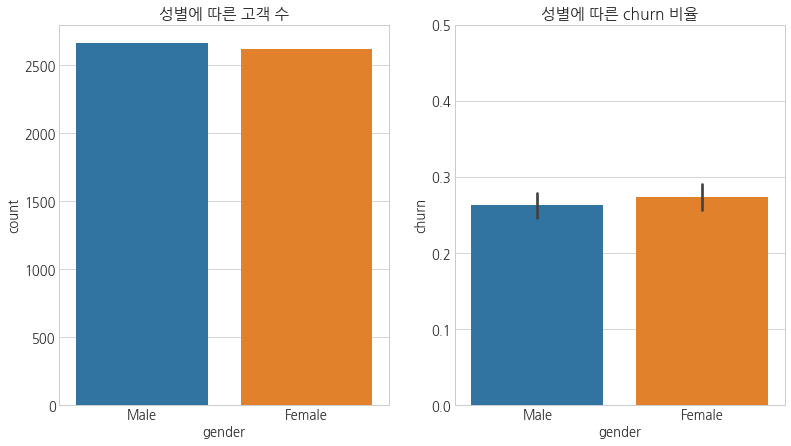

In [199]:
f, ax = plt.subplots(1, 2, figsize=(13, 7))
sns.countplot(df_train.gender, ax=ax[0])
ax[0].set_title('성별에 따른 고객 수')
sns.barplot('gender', 'churn', data=df_train, ax=ax[1])
ax[1].set_title('성별에 따른 churn 비율')
ax[1].set_ylim(0, 0.5)
print('Male ratio: {:.2f}%, Female ratio: {:.2f}%'.format((df_train.gender == 'Male').sum() / len(df_train.gender)*100,
                                                          (df_train.gender == 'Female').sum() / len(df_train.gender)*100))

* 데이터셋 내 성비는 밸런스가 잘 맞는다.
* 성별에 따라 churn 비율의 차이는 적다.

### 3.2 seniorcitizen

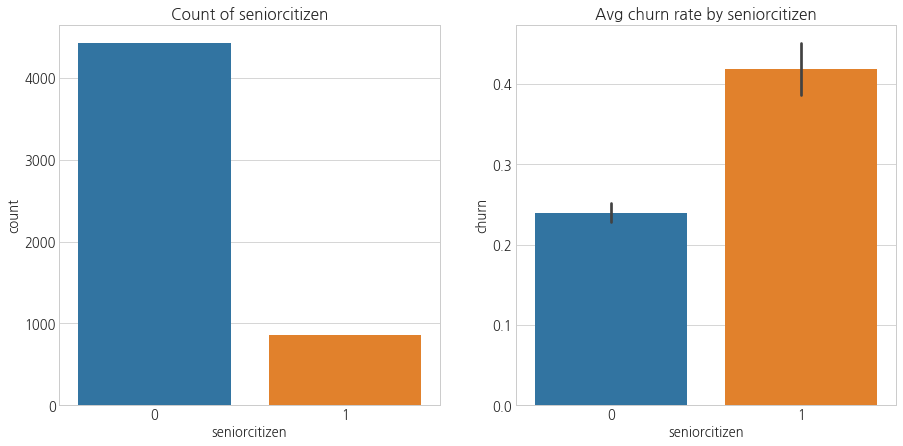

In [297]:
def churn_plot(col):
    f, ax = plt.subplots(1, 2, figsize=(15, 7))
    sns.countplot(col, data=df_train, ax=ax[0])
    ax[0].set_title('Count of {}'.format(col))
    sns.barplot(col, 'churn', data=df_train, ax=ax[1])
    ax[1].set_title('Avg churn rate by {}'.format(col))


churn_plot('seniorcitizen')

* 전체 고객 중 시니어가 차지하는 비율은 약 16%인데, 그들 중 40% 이상이 이탈하였다.
    * 그들이 서비스를 필요로 하지 않기 때문일까?
    * 요즘에는 통신사들에서도 시니어를 위한 서비스가 잘 되어있는데.
* 위의 관점에서, 시니어가 지불한 요금이 궁금해졌다.
    * 젊은 사람들이 더 많이 서비스를 이용할 것이라고 추측되는데, 
    * 그러면 시니어의 비용이 더 적지 않을까?

In [294]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


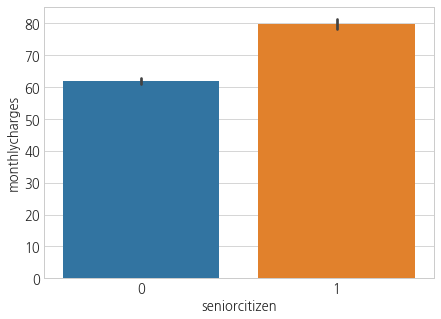

In [299]:
plt.figure(figsize=(7, 5))
sns.barplot('seniorcitizen', 'monthlycharges', data=df_train)
plt.show()

* 오잉! 예상과 반대로 시니어들의 비용이 평균적으로 더 높은 것을 확인할 수 있다.
* Data description에 senior의 명확한 기준이 명시되지는 않았지만,
    * 통상적으로 60-70대 인구를 senior라고 가정한다면, 놀라운 결과인 것 같다.


### 3.3 partner, dependents

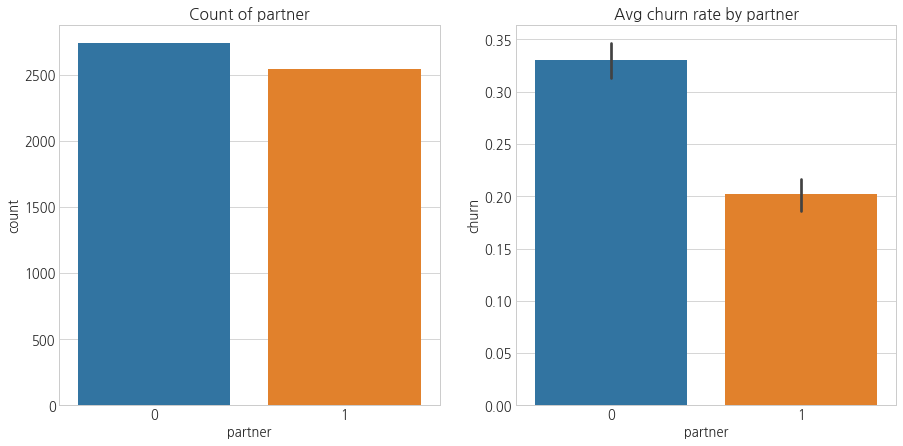

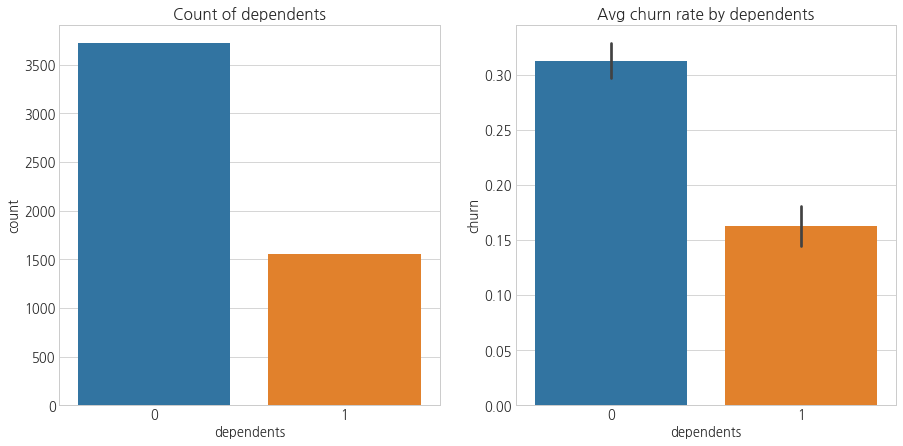

In [302]:
churn_plot('partner')
churn_plot('dependents')

* 파트너나 자식이 있는 경우, churn rate가 낮은 경향을 보인다.
* 패밀리 할인이 잘 되어있나?

### 3.4 tenure

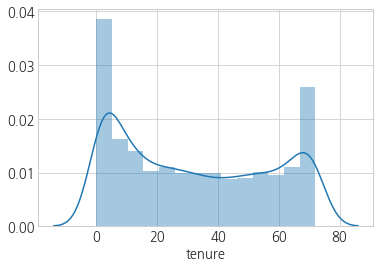

In [319]:
sns.distplot(df_train.tenure)

* 지속기간은 다봉분포를 그리고 있다.

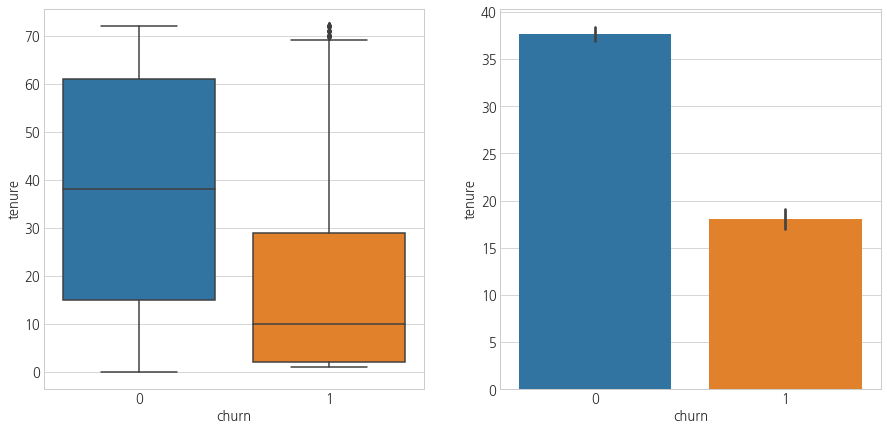

In [313]:
f, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.boxplot('churn', 'tenure', data=df_train, ax=ax[0])
sns.barplot('churn', 'tenure', data=df_train, ax=ax[1])

* 사실 당연하게도, churn customer의 유지 기간이 평균적으로 적음을 확인할 수 있다.

### 3.5 phoneservice, multiplelines

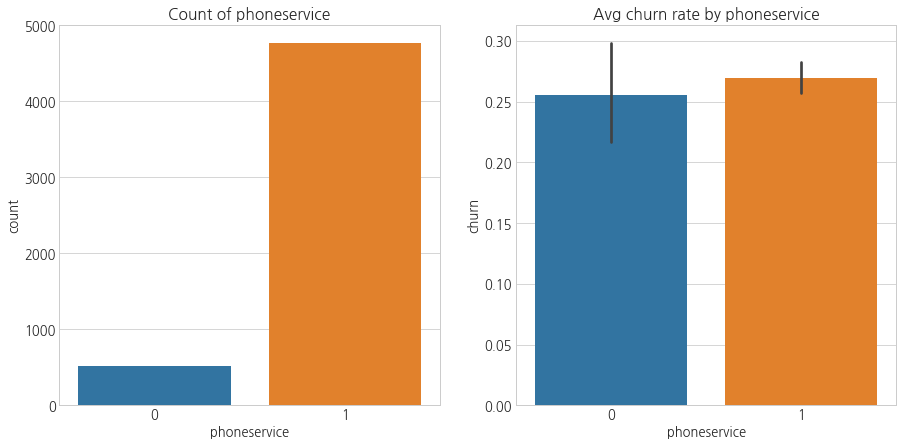

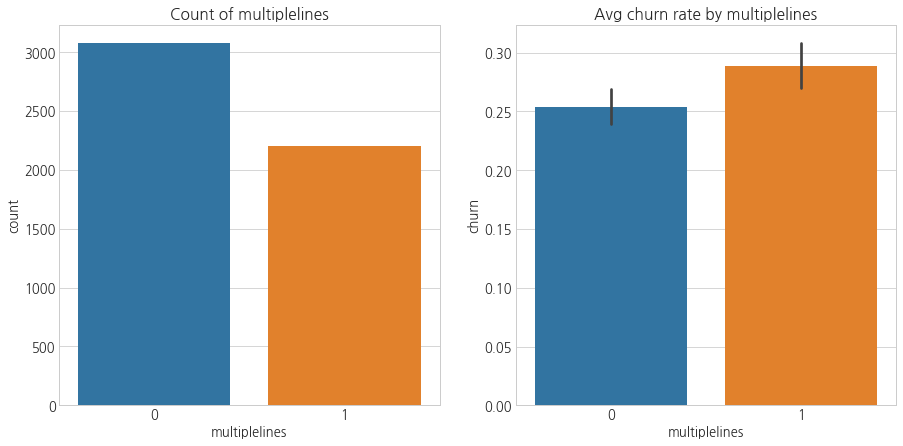

In [323]:
churn_plot('phoneservice')
churn_plot('multiplelines')

### 3.6 internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport	

In [332]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


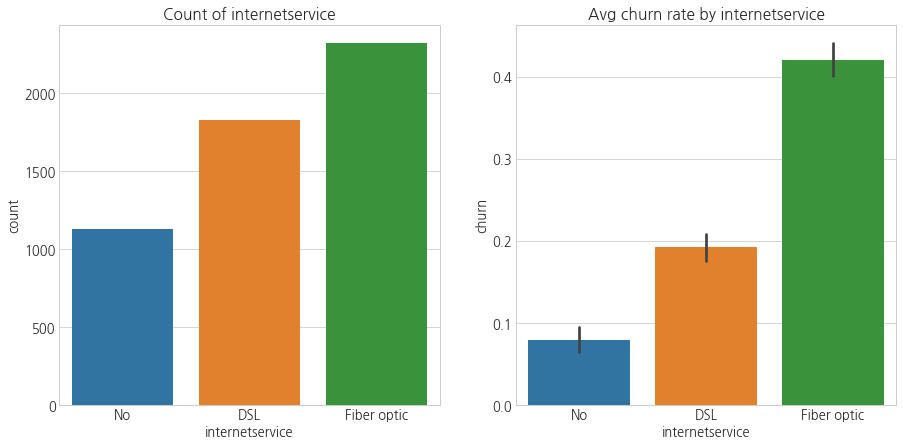

In [333]:
churn_plot('internetservice')

* 광랜을 가장 많이 쓰는데, 그만큼 churn rate도 높다.

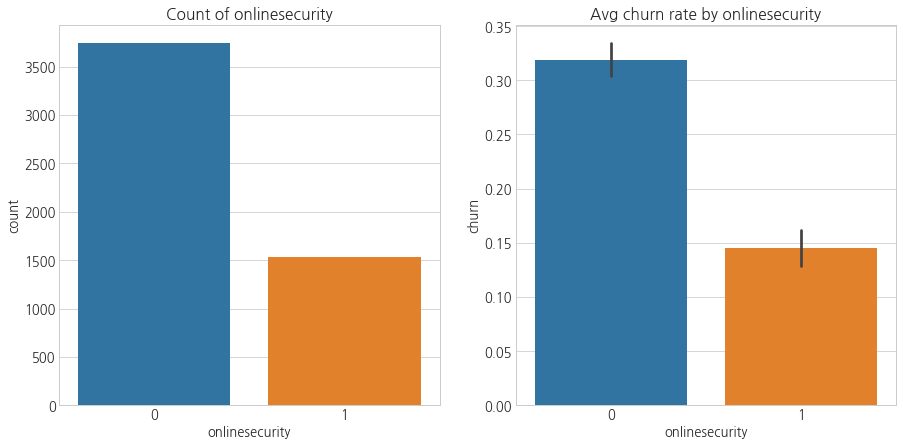

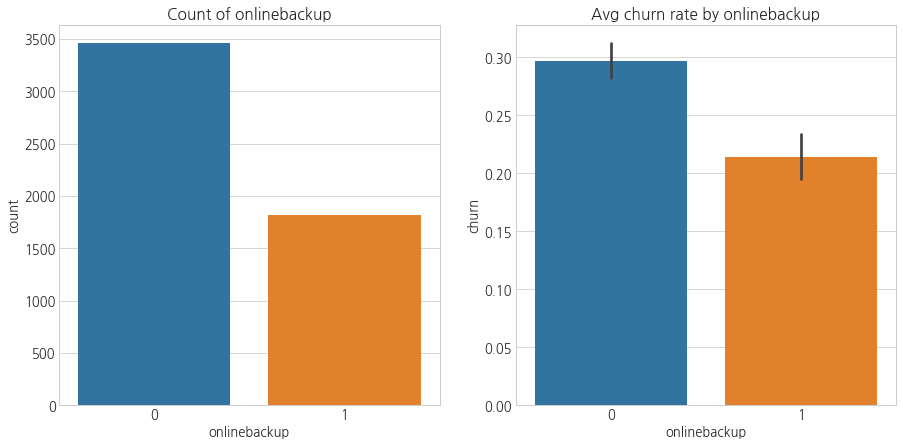

In [334]:
churn_plot('onlinesecurity')
churn_plot('onlinebackup')

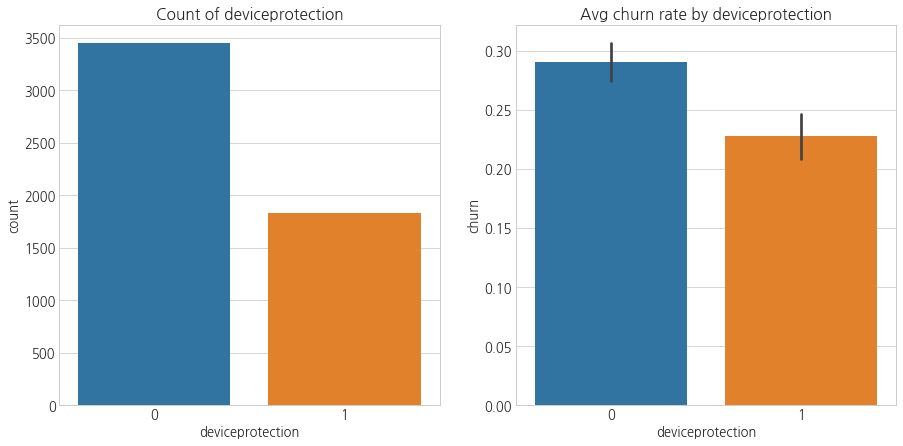

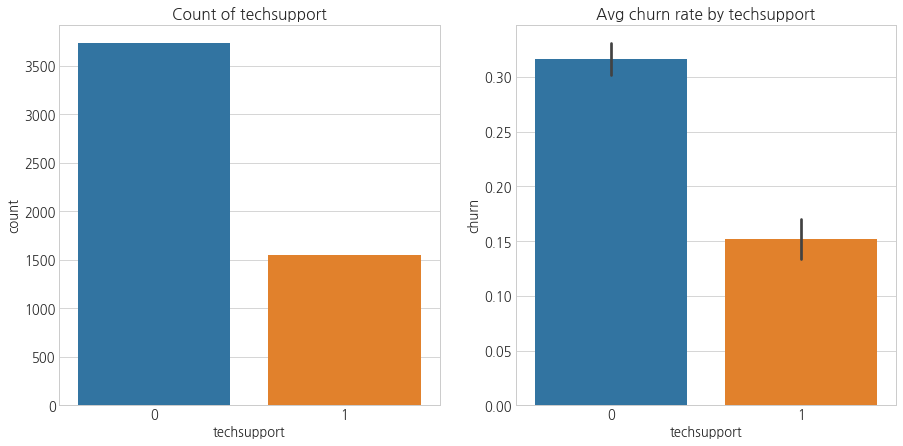

In [335]:
churn_plot('deviceprotection')
churn_plot('techsupport')

### 3.7 	streamingtv, streamingmovies

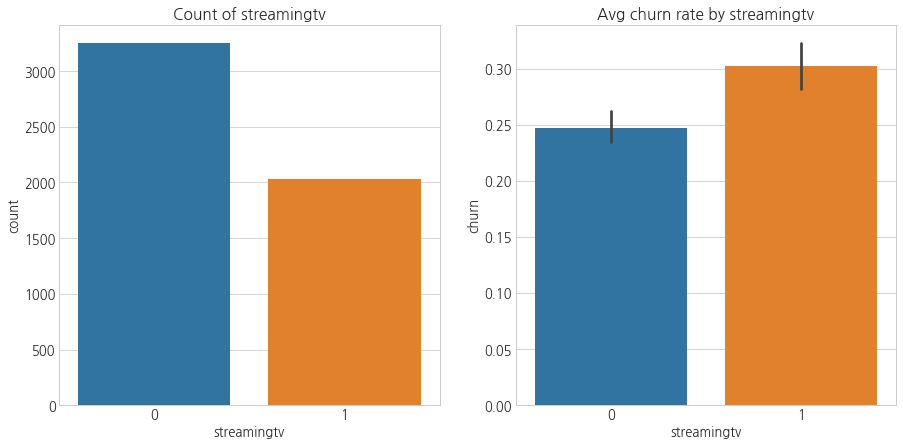

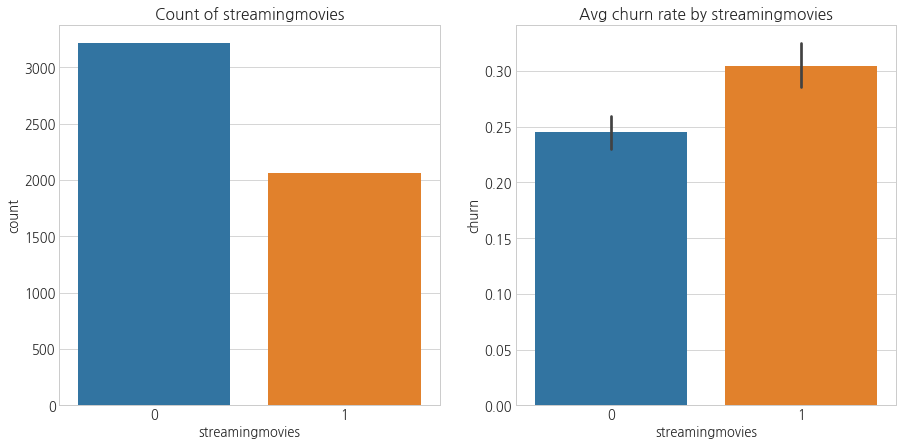

In [338]:
churn_plot('streamingtv')
churn_plot('streamingmovies')

* 스트리밍 서비스를 이용자는 비이용자보다 적지만, churn rate는 5%가량 낮다.

### 3.8 contract

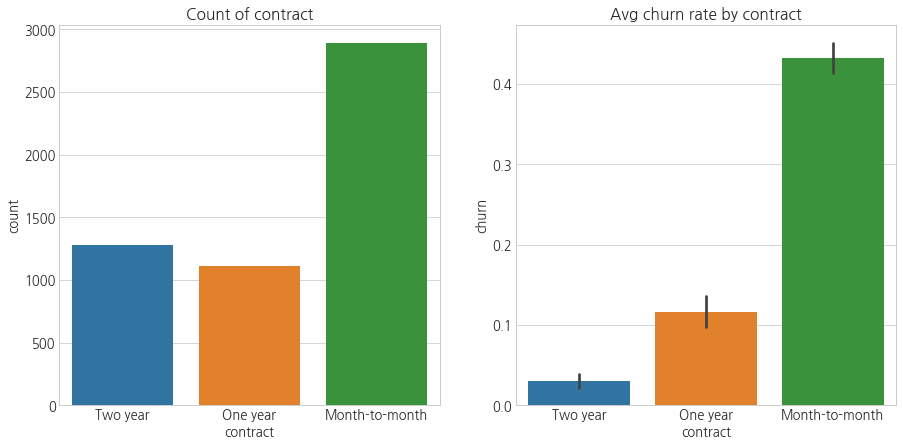

In [339]:
churn_plot('contract')

* 월 단위로 계약하는 경우가 가장 많았지만, 그만큼 churn rate도 높았다.
* 반면, 연 단위로 계약하는 경우에는 chun rate가 줄어든다.
* 월 단위에서 연간 단위 계약으로 이끌어내는것도 하나의 과제가 될 수 있겠다.

### 3.9 paperlessbilling

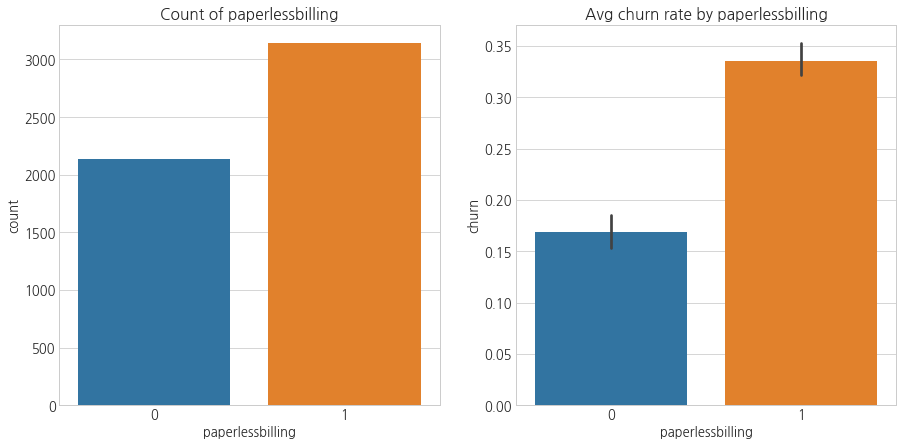

In [341]:
churn_plot('paperlessbilling')

### 3.10 paymentmethod

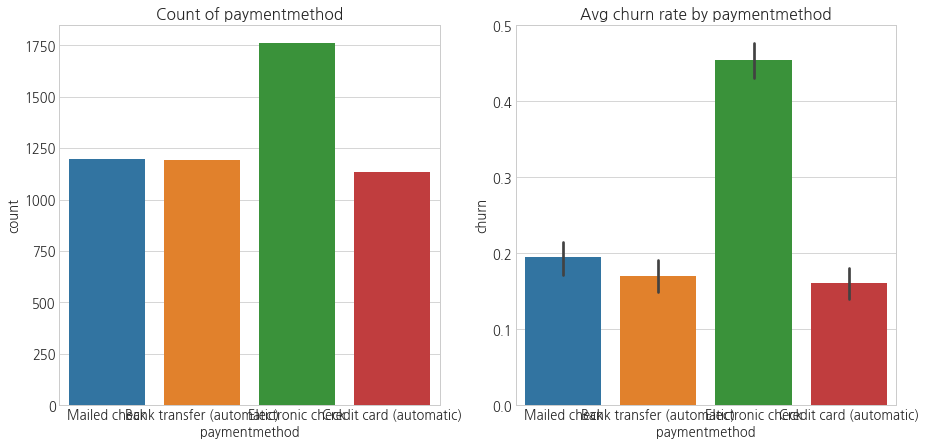

In [347]:
churn_plot('paymentmethod')

In [348]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3996,1395-WSWXR,Male,0,0,0,24,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.75,487.05,0
6116,7445-WMRBW,Female,0,0,0,48,1,1,DSL,0,1,1,1,1,0,One year,1,Bank transfer (automatic),73.85,3581.4,0
6060,4884-ZTHVF,Female,1,0,0,8,1,0,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Electronic check,87.10,713.6,0
2678,7026-YMSBE,Male,0,0,0,30,1,0,No,0,0,0,0,0,0,One year,0,Mailed check,19.70,625.05,0
609,3419-SNJJD,Female,1,1,0,65,1,1,Fiber optic,1,0,1,0,1,1,Month-to-month,0,Bank transfer (automatic),105.25,6786.4,1


### 3.11 monthlycharges

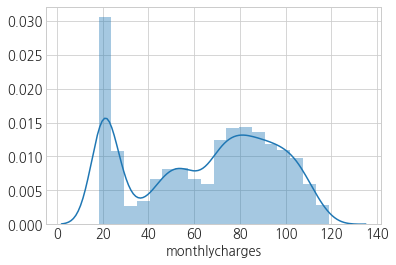

In [351]:
sns.distplot(df.monthlycharges)